[Link1](https://www.geeksforgeeks.org/decision-tree-implementation-python/)
[Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

# Decision Tree ML Algorithm
* Falls under supervised learning algorithms.

### Gini Index and Information Gain
Both of these methods are used to select from the 'n' attributes of the dataset which attribute would be placed at the root or the internal node

#### Gini Index
* Gini Index is ametric to measure how often a randomly chosen element would be incorrectly identified.
* It means an attribute with lower gini index should be preferred.

#### Entropy
* A measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

#### Information Gain
* The entropy typically changes when we use a node in a decision tree to partition the training instances into smaller subsets. Information gain is a measure of change in entropy.

#### Accuracy score
* Used to calculate the accuracy of the trained classifier.

#### Confusion Matrix
* Confusion Matrix is used to understand the trained classifier behavior over the test dataset or calidate dataset.+

# Understanding Confusion Matrix
Nice [article](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) describing confusion matrics 

* It is a performance measurement for machine learning classification problems where output can be two or more classes.
* It is a table with 4 different combinations of predicted and actual values
* It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and AUC-ROC curve.

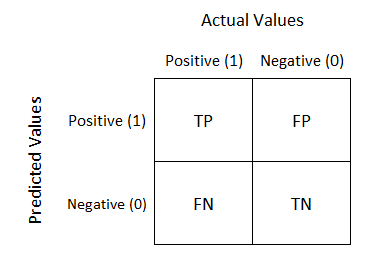

* True Positive (TP):
    * You predicted positive and it's true.
* True Negative (TN):
    * You predicted negative and it's true.
* False Positive (FP) (Type 1 Error):
    * You predicted positive and it's false.
* False Negative (FN) (Type 2 Error):
    * You predicted negative and it's false.

##### We describe predicted values as Postive and Negative and actual values as True and False


In [124]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')

In [125]:
# Load all the training and testing data
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [126]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

dt_results = confusion_matrix(y_test, y_pred_dt)
dt_error = zero_one_loss(y_test, y_pred_dt)
dt_score = accuracy_score(y_test, y_pred_dt) * 100
dt_report = classification_report(y_test, y_pred_dt)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [127]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{dt_results[0]}")
print(f"{dt_results[1]} \n")

print("Report :")
print(gini_report) 

print(f"True Postive   : {dt_results[0][0]}")
print(f"False Positive : {dt_results[0][1]}")
print(f"False Negative : {dt_results[1][0]}")
print(f"True Negative  : {dt_results[1][1]}")
print(f"Error Value    : {dt_error}")
print(f"Accuracy_Score : {dt_score}")
print("=================================================")

Total time: 88.3533 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[723569      9]
[     7 215363] 

Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    723578
           1       1.00      0.99      1.00    215370

    accuracy                           1.00    938948
   macro avg       1.00      1.00      1.00    938948
weighted avg       1.00      1.00      1.00    938948

True Postive   : 723569
False Positive : 9
False Negative : 7
True Negative  : 215363
Error Value    : 1.7040347282226698e-05
Accuracy_Score : 99.99829596527178


In [150]:
features = dt_classifier.feature_importances_
i = 0
for feature in features:
    print(f"{X_test.columns[i]} : {feature}")
    i = i + 1

Dst Port       : 0.4850361803083482
Flow Duration       : 1.9990833162849886e-06
Tot Fwd Pkts       : 1.2622399892355151e-05
Tot Bwd Pkts       : 0.00016170121566869868
TotLen Fwd Pkts       : 0.0
TotLen Bwd Pkts       : 0.0
Fwd Pkt Len Max       : 2.4732663471210343e-06
Fwd Pkt Len Min       : 0.0
Fwd Pkt Len Mean       : 0.0
Fwd Pkt Len Std       : 0.0
Bwd Pkt Len Max       : 1.0403076834358642e-05
Bwd Pkt Len Min       : 0.0
Bwd Pkt Len Mean       : 0.007312159469574291
Bwd Pkt Len Std       : 0.0
Flow Byts/s       : 0.0
Flow Pkts/s       : 0.0
Flow IAT Mean       : 6.299251046756801e-07
Flow IAT Std       : 0.00019591166985169291
Flow IAT Max       : 1.7650499849475125e-06
Flow IAT Min       : 0.0001680397987874048
Fwd IAT Tot       : 9.605579533125643e-06
Fwd IAT Mean       : 0.00017607572905084927
Fwd IAT Std       : 2.59144618925879e-05
Fwd IAT Max       : 1.5058537021898257e-07
Fwd IAT Min       : 3.2460352570476386e-06
Bwd IAT Tot       : 0.0
Bwd IAT Mean       : 0.0
Bwd IAT S

In [128]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test) 

gini_results = confusion_matrix(y_test, y_pred_gini)
gini_accuracy_score = accuracy_score(y_test, y_pred_gini)
gini_error = zero_one_loss(y_test, y_pred_gini)
gini_report = classification_report(y_test, y_pred_gini)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [129]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Gini Index Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{gini_results[0]}")
print(f"{gini_results[1]} \n")

print("Report :")
print(gini_report) 

print(f"True Postive   : {gini_results[0][0]}")
print(f"False Positive : {gini_results[0][1]}")
print(f"False Negative : {gini_results[1][0]}")
print(f"True Negative  : {gini_results[1][1]}")
print(f"Error Value    : {gini_error}")
print(f"Accuracy_Score : {gini_accuracy_score}")
print("=================================================")


Total time: 45.2325 seconds 

Gini Index Results
Confusion Matrix:
[723377    201]
[  1417 213953] 

Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    723578
           1       1.00      0.99      1.00    215370

    accuracy                           1.00    938948
   macro avg       1.00      1.00      1.00    938948
weighted avg       1.00      1.00      1.00    938948

True Postive   : 723377
False Positive : 201
False Negative : 1417
True Negative  : 213953
Error Value    : 0.0017232051189203235
Accuracy_Score : 0.9982767948810797


---------------------------------------------------------------------------------
# Decision Tree Classifier Entropy

In [130]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

entropy_results = confusion_matrix(y_test, y_pred_entropy)
entropy_accuracy_score = accuracy_score(y_test, y_pred_entropy)
entropy_error = zero_one_loss(y_test, y_pred_entropy)
entropy_report = classification_report(y_test, y_pred_entropy)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [131]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Entropy Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{entropy_results[0]}")
print(f"{entropy_results[1]} \n")

print("Report :")
print(entropy_report) 

print(f"True Postive   : {entropy_results[0][0]}")
print(f"False Positive : {entropy_results[0][1]}")
print(f"False Negative : {entropy_results[1][0]}")
print(f"True Negative  : {entropy_results[1][1]}")
print(f"Error Value    : {entropy_error}")
print(f"Accuracy_Score : {entropy_accuracy_score}")
print("=================================================")


Total time: 47.0581 seconds 

Entropy Results
Confusion Matrix:
[723377    201]
[  1417 213953] 

Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    723578
           1       1.00      0.99      1.00    215370

    accuracy                           1.00    938948
   macro avg       1.00      1.00      1.00    938948
weighted avg       1.00      1.00      1.00    938948

True Postive   : 723377
False Positive : 201
False Negative : 1417
True Negative  : 213953
Error Value    : 0.0017232051189203235
Accuracy_Score : 0.9982767948810797


In [ ]:
Entropy Reduction SCore